<a href="https://colab.research.google.com/github/LuizFelipeMonteiro/Luiz_data_science/blob/main/Projeto_do_airbnb_de_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [ ]:
 # importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2022-12-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número usado para identificar o imóvel
* name - pessoa ou empresa que está anunciando 
* host_id - número usado para identificar o proprietário
* host_name - nome do proprietário
* neighbourhood_group - região
* neighbourhood - bairro
* latitude - coordenadas
* longitude - coordenadas
* room_type - tipo de imóvel
* price - preço da diária
* minimum_nights - mínimo de noites para locação
* number_of_reviews - número de avaliações da propriedade
* last_reviews - última avaliação
* reviews_per_month - avaliações por mês 
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - avaliação de desempenho dos ultimos 12 meses 
* license - licença para alugueis



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)



Entradas:	 40438
Entradas:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.746229
reviews_per_month                 0.261759
last_review                       0.261759
host_name                         0.000049
name                              0.000049
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Os dados ausentes mais relevantes são:
*	license: Nos EUA é exigido uma licença para o aluguel de residências, porém está regulamentação incide em imóveis com alugueis abaixo de 30 dias.
* reviews_per_month: Algumas pessoas não avaliam o imóvel ou já alugaram o mesmo várias vezes e fazem uma única avaliação.
* last_review: Este provavelmente é uma simples falha de preenchimento.


Concluísse que estes dados ausentes não terão um impacto relevante na análise.


### **Q3. Qual o tipo de distribuição das variáveis?** 

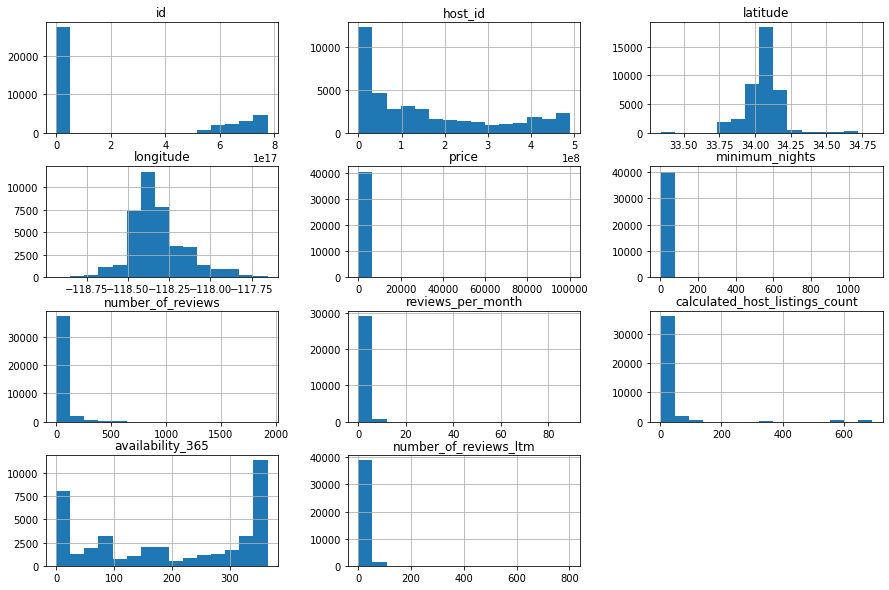

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Observando o histograma percebesse a presença de outliers principalmente nas colunas price e minimum_nights, estes outliers estão distorcendo os dados e precisam ser tratados.

In [ ]:
# Resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40438.000000,40438.000000,40438.000000,29853.000000,40438.000000,40438.000000
mean,279.449602,18.700653,33.562021,1.499085,32.550126,198.164969
std,1136.463147,30.973639,72.691163,1.866809,114.678176,142.646899
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000,0.000000,0.240000,1.000000,62.000000
50%,138.000000,30.000000,5.000000,0.800000,2.000000,190.000000
75%,235.000000,30.000000,31.000000,2.250000,10.000000,348.000000
max,99999.000000,1124.000000,1924.000000,89.000000,693.000000,365.000000


Observando as informações acima, podemos concluir:


*	A mediana dos preços é de 138 dólares, mas temos um preço máximo de 99999 dólares, ou seja, claramente existem outliers. Precisamos lidar com esses valores fora da curva para termos medias mais próximas da realidade.
*	Podemos ver que a mediana das noites mínimas é de 30 dias, considerando este valor correto identificamos que na cultura norte americana as pessoas geralmente alugam por um mês completo, porém há um valor máximo de 1124 noites, isto claramente é um outlier. Precisamos lidar com ele para podermos ter valores mais próximos a realidade.



Para começar, vamos observar quantos anúncios estão com noites mínimas acima de 45 dias.

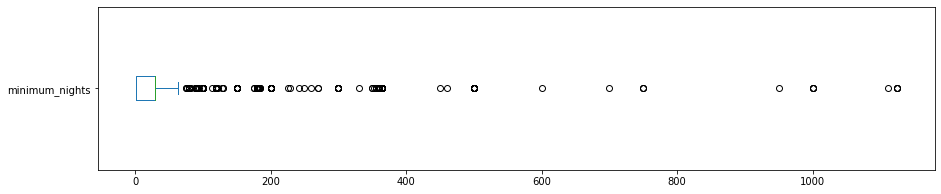

minimum_nights: valores acima de 45:
631 entradas
1.5604%


In [ ]:
# Plotar um boxplot para melhor identificação dos outlaiers de minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 45:")
print("{} entradas".format(len(df[df.minimum_nights > 45])))
print("{:.4f}%".format((len(df[df.minimum_nights > 45]) / df.shape[0])*100))

Aqui veremos quantas residências estão com valores da diária acima de 1000 dólares.

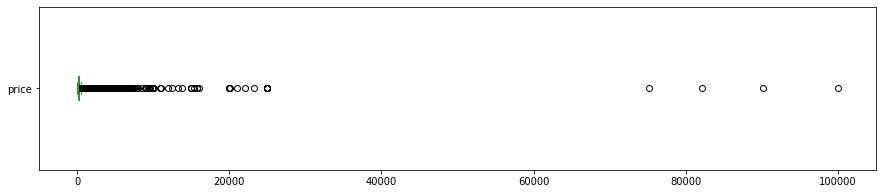

price: valores acima de 1000:
1388 entradas
3.4324%


In [ ]:
# Plotar um boxplot para melhor identificação dos outlaiers de price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1000 dolares para price
print("price: valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

Vamos remover os valores acima de 45 dias de minimum_nights e os valores acima de 1000 dólares de price.

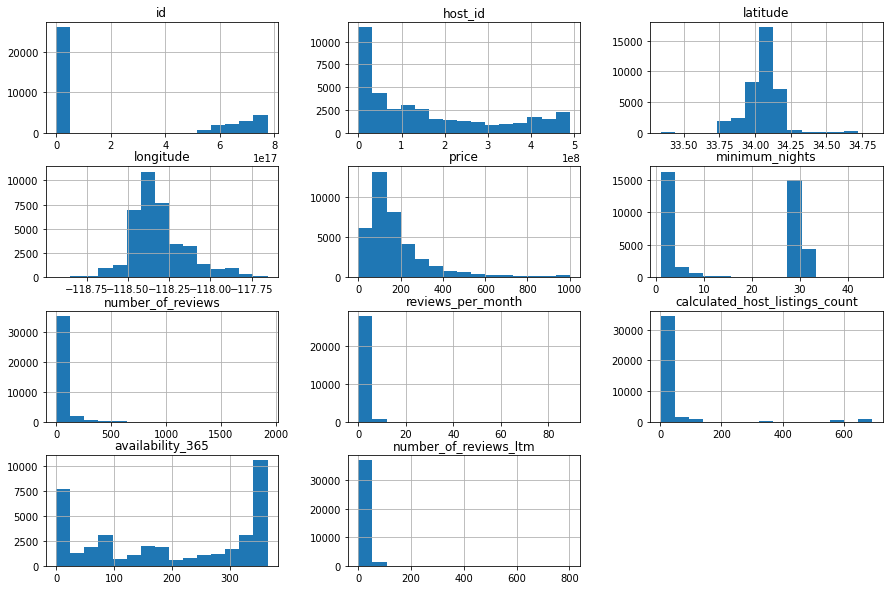

In [ ]:
# Remover os "outlaiers" para um novo DataFrame "df_clean"
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 45].index, axis = 0, inplace=True)

# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


Depois de uma limpeza de dados, percebemos que para a cidade de Los Angeles geralmente os alugueis são para 2 dias, ou seja, para fins de semana ou para o mês inteiro, por ser uma cidade turística e com muitas praias, as famílias alugam casas para o período de férias. Por isso o número de casas alugadas por 30 dias é relevante.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# Ver a média da coluna "price"
df_clean.price.mean()

183.38614608261366

Depois da limpeza de dados a média dos preços caiu de 278,44 para 183,38. Porém a mediana pouco mudou, isto nos mostra que os outliers estavam elevando muito a média dos preços. Agora temos uma média de preços real de 183,38 dólares.

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.122814,-0.044009,0.006927,-0.063625,0.054910
minimum_nights,-0.122814,1.000000,-0.189340,-0.433737,0.214569,0.012817
number_of_reviews,-0.044009,-0.189340,1.000000,0.576233,-0.113459,-0.033474
reviews_per_month,0.006927,-0.433737,0.576233,1.000000,-0.105789,0.068454
calculated_host_listings_count,-0.063625,0.214569,-0.113459,-0.105789,1.000000,0.207109
availability_365,0.054910,0.012817,-0.033474,0.068454,0.207109,1.000000


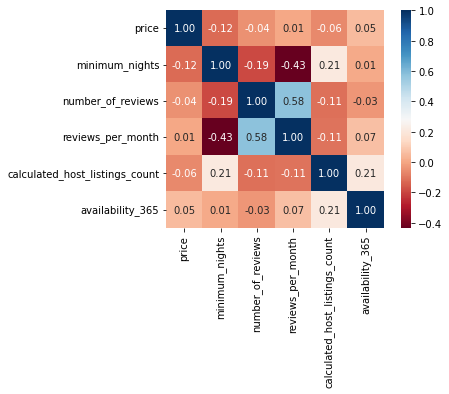

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square= True, linecolor="white", annot= True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

O tipo de imóvel mais alugado na cidade de Los Angeles são Casas e apartamentos, seguido por quartos individuais.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    26636
Private room       10960
Shared room          770
Hotel room            78
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    69.285194
Private room       28.509000
Shared room         2.002913
Hotel room          0.202893
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Los Angeles é uma cidade grande e muito procurada por todos, abaixo veremos algumas analises interessantes sobre a disposição de imóveis na cidade.  


In [ ]:
# Ver a media de preço por noite dos bairros
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Malibu                                   518.129167
Unincorporated Santa Monica Mountains    414.704225
Hidden Hills                             414.000000
Bel-Air                                  407.823529
Beverly Crest                            397.588235
Hollywood Hills West                     389.355978
Avalon                                   381.275132
Rolling Hills Estates                    342.200000
Pacific Palisades                        334.460993
Sepulveda Basin                          330.000000
Name: price, dtype: float64

Podemos ver que Malibu é o bairro mais caro de Los Angeles, é algo esperado por ter várias casas de praia luxuosas. Os dados acima nos mostram algo bem próximo da realidade, principalmente para quem for alugar com a intenção de férias. Porém existem algumas características nos bairros mais centrais, o número de imóveis para alocação é maior e também existem muitos quartos usados por poucos dias ou até uma única noite. Veremos abaixo como exemplo o caso de Beverly Hills.

In [ ]:
# Ver a média de noites minimas por bairro
df_clean.groupby(["neighbourhood"]).minimum_nights.mean().sort_values(ascending=False)[:10]

neighbourhood
University Park           30.241379
Green Meadows             30.000000
South Park                30.000000
Historic South-Central    29.228814
Adams-Normandie           29.200000
Beverlywood               28.777778
Koreatown                 28.465000
Lincoln Heights           27.652174
West Los Angeles          27.642857
Sherman Oaks              27.596003
Name: minimum_nights, dtype: float64

Aqui vemos a média de noites mínimas por bairro, logo percebemos que o University Park está com a maior média, superior a 30 dias. Isto é natural, pois é usado por estudantes.
Também percebemos que a media de noites mínimas é alta em vários bairros, isto porque Los Angeles é muito usada para a temporada de férias.




**Beverly Hills** é um bairro nobre de Los Angeles, porém por ser um bairro mais central tem uma média de preços mais baixa por conta de boa parte dos imóveis anunciados serem quartos para poucos dias.







In [ ]:
# Informações sobre Beverly Hills
df_clean.loc[df["neighbourhood"] == "Beverly Hills"].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.059000e+03,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,527.000000,1059.000000,1059.000000,1059.000000
mean,4.566970e+17,2.725618e+08,34.064340,-118.388640,206.173749,7.563739,13.075543,1.336129,31.282342,257.590179,4.968839
std,3.535962e+17,1.970258e+08,0.007127,0.009931,149.738304,11.290897,38.144536,1.480429,59.899164,138.602382,11.888660
min,5.287100e+04,1.560820e+05,34.053070,-118.425870,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.375294e+07,6.314672e+07,34.060025,-118.394272,120.000000,1.000000,0.000000,0.270000,2.000000,133.500000,0.000000
50%,7.019241e+17,3.032508e+08,34.062280,-118.385248,150.000000,2.000000,0.000000,0.910000,17.000000,342.000000,0.000000
75%,7.531031e+17,4.842760e+08,34.066150,-118.383851,234.000000,7.000000,7.000000,1.875000,54.000000,365.000000,3.000000
max,7.740364e+17,4.896686e+08,34.110840,-118.372600,1000.000000,45.000000,421.000000,10.410000,693.000000,365.000000,106.000000


É possível perceber algumas coisas:
*	A média de preço é de 206 dólares
*	A mediana de noites mínimas é de 2 dias
*	A média de noite de mínimas é de 7 dias


Isso mostra que Beverly Hills é um bairro mais diversificado na questão de alugueis, contendo imóveis tanto para ferias, finais de semanas e pessoas que precisam de poucos dias para um projeto profissional.


In [ ]:
# ver quantidade de imóveis em Beverly Hills
print(df_clean[df_clean.neighbourhood == "Beverly Hills"].shape)

# ver as 5 ultimas entradas
df_clean[df_clean.neighbourhood == "Beverly Hills"].tail()

(1059, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
40310,772359232483750159,LA’s Bunk Bed Mixed Shared Room,488655599,Jorge,Other Cities,Beverly Hills,34.057899,-118.385889,Shared room,16,1,0,NaN,NaN,16,365,0,NaN
40353,773859368129315542,Palace-like BH Home w/ Hot Tub,351601637,Charlie,Other Cities,Beverly Hills,34.061956,-118.375517,Entire home/apt,675,1,0,NaN,NaN,52,359,0,NaN
40364,774030469064371430,LA’s Bunk Bed Mixed Shared Room,488655599,Jorge,Other Cities,Beverly Hills,34.058282,-118.384197,Shared room,16,1,0,NaN,NaN,16,364,0,NaN
40366,774033386610297086,LA’s Bunk Bed Mixed Shared Room,488655599,Jorge,Other Cities,Beverly Hills,34.060044,-118.386220,Shared room,16,1,0,NaN,NaN,16,361,0,NaN
40368,774036442170180417,LA’s Bunk Bed Mixed Shared Room,488655599,Jorge,Other Cities,Beverly Hills,34.058189,-118.384517,Shared room,16,1,0,NaN,NaN,16,365,0,NaN


Beverly Hills tem 1059 imóveis para alugar, podemos ver acima alguns shared rooms por 16 dólares a diária, este é o motivo do bairro não aparecer como um dos mais caros de Los Angeles.

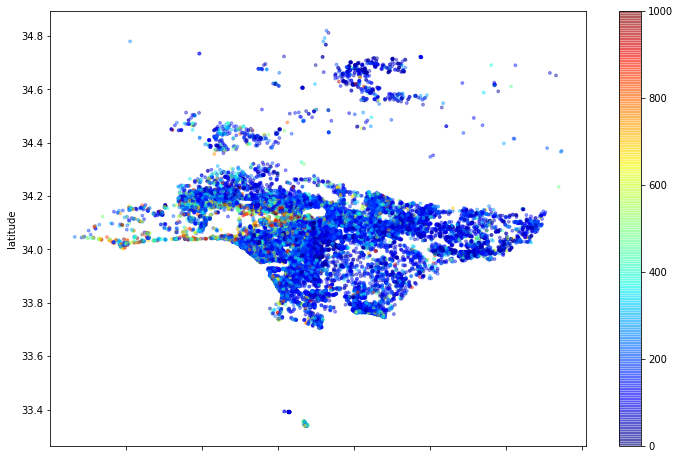

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"],s=8, 
              cmap=plt.get_cmap("jet"),figsize=(12,8));

Vemos pelo gráfico a disposição dos imóveis, pode-se dizer que Los Angeles em sua área urbana e nas praias nos dá excelentes opções. Sendo possível encontrar o imóvel ideal para todo tipo de ocasião.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

16.480048902299448

Aqui vemos a média para noites mínimas, que é pouco mais que 16 noites. Isto explica a diversidade de Los Angeles, pois os regimes de aluguel mais usados são de 30 dias e 2 dias, ou seja, o final de semana ou o período inteiro de férias.


## Conclusões


Após a análise dos dados do airbnb para a cidade de Los Angeles chegamos a algumas conclusões:
*	Los Angeles tem uma rica diversidade, podendo atender vários tipos de público, desde os que procuram casas perto da praia, tanto para quem quer uma calmaria maior nas montanhas.
*	As residências de Los Angeles têm uma variedade de preço muito boa, podendo ser encontrados alugueis para todos. Desde casas luxuosas à beira mar até quartos por 16 dólares a diária para quem precisa passar apenas uma noite na cidade
*	Um dos motivos para ter muitos alugueis por um período acima de 30 dias é que existe uma regulamentação mais rígida para alugueis de curtos períodos de tempo, esta regulamentação é usada para proteger a moradia dos moradores da cidade. Por isso vemos um grande número de alugueis para 2 dias, depois disso o número só volta a aumentar em 30 dias, por conta dessa regulamentação a cidade acabou se adaptando.
* Por fim, Los Angeles oferece aos seus visitantes o que eles procuram. Independente do evento que o faça ir até a cidade, ela terá um quarto, casa ou apartamento perfeito para a ocasião.
